# Laboratorio 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

C:\Users\juana\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\juana\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\juana\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Ejercicio 7

In [2]:
microscope = cv2.imread('microscope.png', cv2.IMREAD_GRAYSCALE)

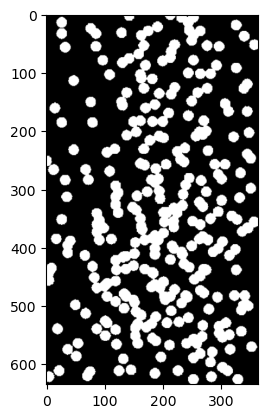

In [3]:
plt.imshow(microscope, cmap="gray")
plt.show()

In [4]:
pixels = microscope.flatten()
pixel_counts = pd.Series(pixels).value_counts().sort_values(ascending=False)
pixel_counts

0      153665
255     43502
254     18353
1         138
252       115
        ...  
194        31
122        31
84         31
208        27
150        25
Name: count, Length: 256, dtype: int64

In [5]:
microscope_binary = microscope.copy()
for i in range(len(microscope_binary)):
    for j in range(len(microscope_binary[i])):
        if microscope_binary[i][j] > 0:
            microscope_binary[i][j] = 255

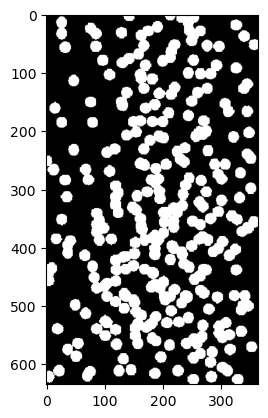

In [6]:
plt.imshow(microscope_binary, cmap="gray")
plt.show()

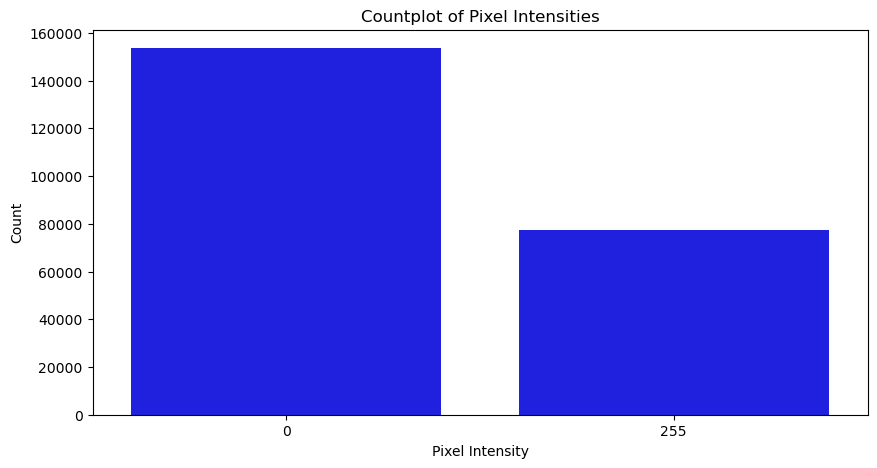

In [7]:

# Flatten the image array
pixels = microscope_binary.flatten()

# Create a countplot using Seaborn
plt.figure(figsize=(10, 5))
sns.countplot(x=pixels, color='blue')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.title('Countplot of Pixel Intensities')
plt.show()

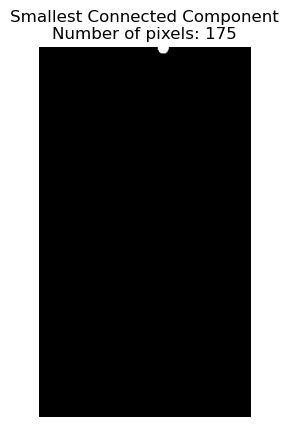

In [8]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(microscope_binary, connectivity=8)


min_label = 1  
min_size = microscope_binary.size  

for label in range(1, num_labels): 
    if stats[label, cv2.CC_STAT_AREA] < min_size:
        min_label = label
        min_size = stats[label, cv2.CC_STAT_AREA]

smallest_component = (labels == min_label).astype(np.uint8) * 255

num_pixels_smallest_component = np.sum(smallest_component == 255)

plt.imshow(smallest_component, cmap='gray')
plt.title(f'Smallest Connected Component\nNumber of pixels: {num_pixels_smallest_component}')
plt.axis('off')
plt.show()

Number of cells detected: 3
True number of cells: 100
Difference: 97


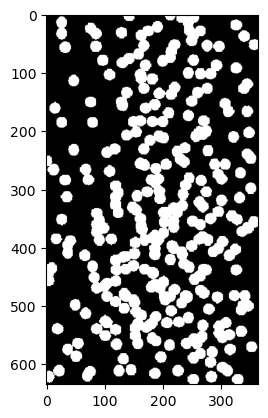

In [9]:
blurred_image = cv2.GaussianBlur(microscope_binary, (5, 5), 0)

_, binary_image = cv2.threshold(microscope_binary, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)

contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(microscope_binary, contours, -1, (0, 255, 0), 1)

num_cells_detected = len(contours)

print("Number of cells detected:", num_cells_detected)

true_num_cells = 100  
if true_num_cells:
    print("True number of cells:", true_num_cells)
    print("Difference:", true_num_cells - num_cells_detected)

plt.imshow(microscope_binary, cmap="gray")
plt.show()

## Ejercicio 8

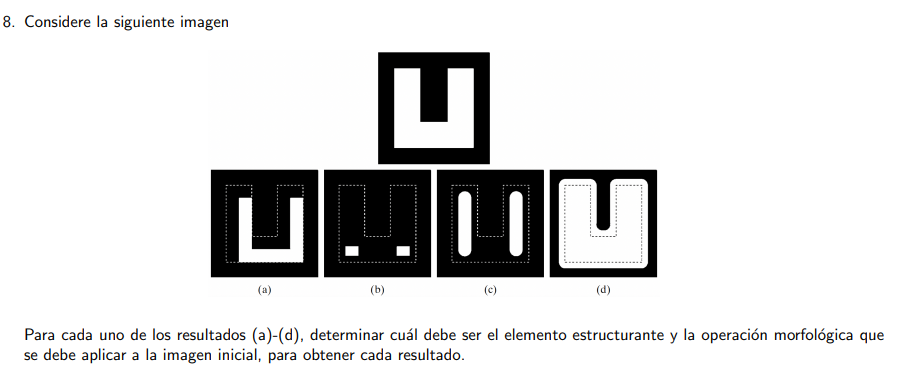

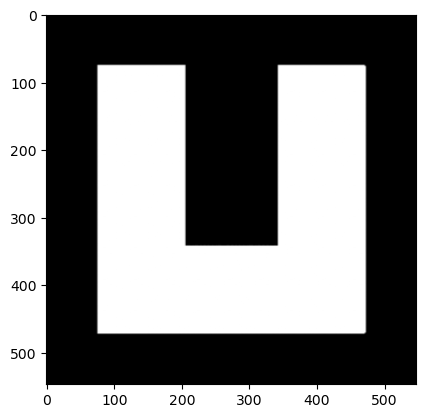

In [10]:
u = cv2.imread('u.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(u, cmap="gray")
plt.show()

In [11]:
u_binary = u.copy()
for i in range(len(u_binary)):
    for j in range(len(u_binary[i])):
        if u_binary[i][j] > 120:
            u_binary[i][j] = 255
        else:
            u_binary[i][j] = 0

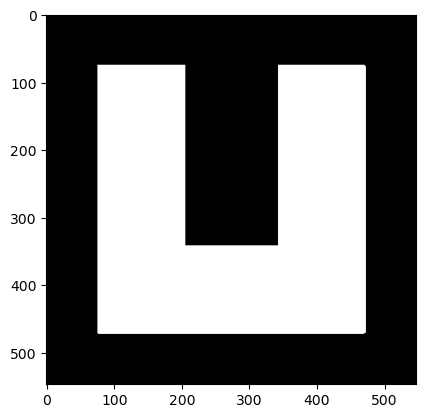

In [12]:
plt.imshow(u_binary, cmap="gray")
plt.show()

In [13]:
u_binary.shape

(547, 547)

### a)

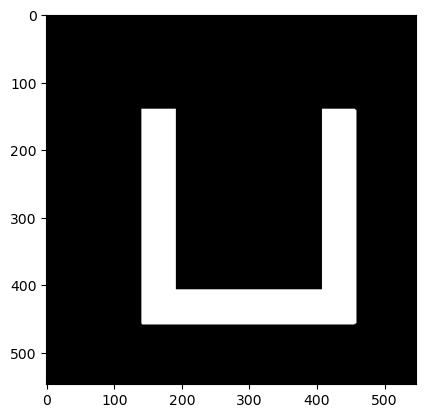

In [14]:
kernel = np.array([[200, 200, 0],
                   [200, 200, 0],
                   [0, 0, 0]], dtype=np.uint8)

# Realizar la dilatación solo en el lado derecho
dilatacion_derecha = cv2.erode(u_binary, kernel, iterations=50)

kernel2 = np.ones((30,30), np.uint8)

erosion = cv2.erode(dilatacion_derecha, kernel2, iterations=1)

# Mostrar la imagen original y la imagen reducida diagonalmente
plt.imshow(erosion, cmap="gray")
plt.show()

### b)

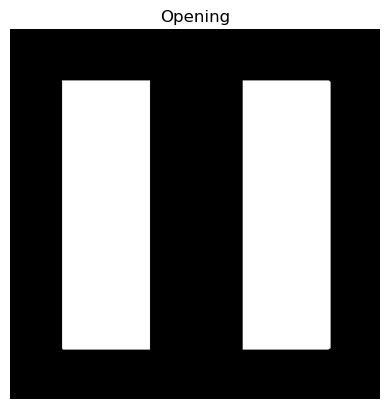

In [16]:
cuadrado = cv2.getStructuringElement(cv2.MORPH_RECT, (10,150))
opening = cv2.morphologyEx(u_binary, cv2.MORPH_OPEN, cuadrado)
plt.imshow(opening, cmap='gray')
plt.title('Opening')
plt.axis('off')
plt.show()

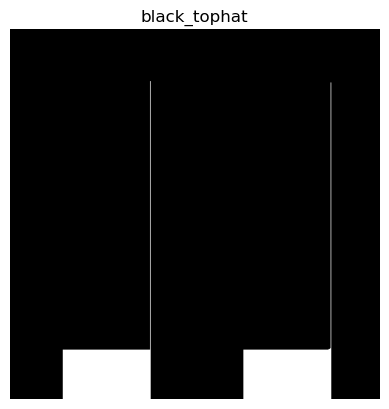

In [17]:
cuadrado = cv2.getStructuringElement(cv2.MORPH_RECT, (10,150))
black_tophat = cv2.morphologyEx(opening, cv2.MORPH_BLACKHAT, cuadrado)
plt.imshow(black_tophat, cmap='gray')
plt.title('black_tophat')
plt.axis('off')
plt.show()

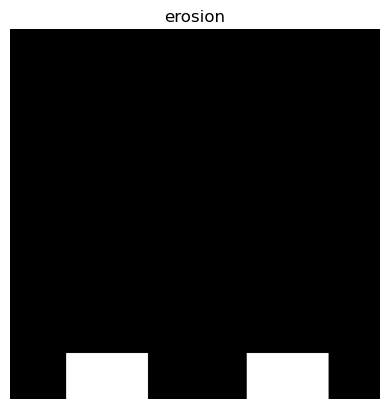

In [18]:
cuadrado = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
erosion = cv2.erode(black_tophat, cuadrado, iterations=1)
plt.imshow(erosion, cmap='gray')
plt.title('erosion')
plt.axis('off')
plt.show()

### c)

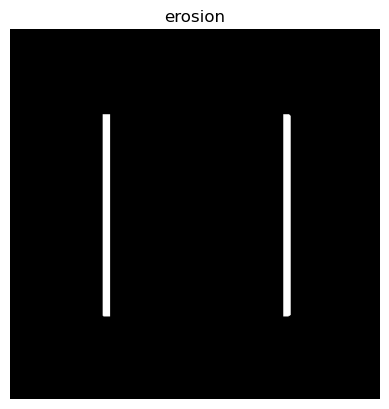

In [20]:
cuadrado = cv2.getStructuringElement(cv2.MORPH_RECT, (120,100))
erosion = cv2.erode(opening, cuadrado, iterations=1)
plt.imshow(erosion, cmap='gray')
plt.title('erosion')
plt.axis('off')
plt.show()

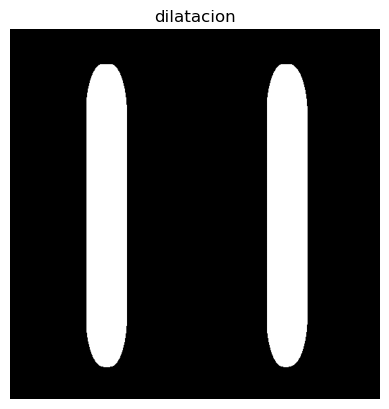

In [21]:
elipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50,150))
dilatacion = cv2.dilate(erosion, elipse, iterations=1)
plt.imshow(dilatacion, cmap='gray')
plt.title('dilatacion')
plt.axis('off')
plt.show()

### d)

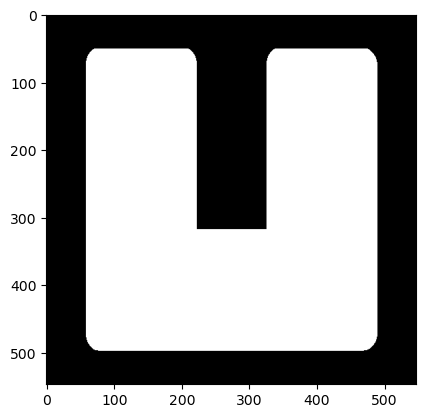

In [15]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (35, 50))
dilated_image = cv2.dilate(u_binary, kernel)

plt.imshow(dilated_image, cmap="gray")
plt.show()